<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/Imers%C3%A3o_Dados_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

#Aula 01

##Desafio 1 - Proporção dos inscritos por idade.

In [ ]:
#Importando bibliotecas e dados do ENEM 2019 (amostra disponibilizada pela Alura)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

In [ ]:
#Visualização das cinco primeiras linhas dos dados
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
#Visualização do número de linhas e colunas 
dados.shape

(127380, 136)

In [ ]:
#Frequência das idades dos inscritos
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
#Conversão da frequência das idades dos inscritos para percentual
proporcao = round(dados['NU_IDADE'].value_counts(normalize=True) * 100)
proporcao.head()

18    17.0
17    17.0
19    11.0
20     8.0
16     6.0
Name: NU_IDADE, dtype: float64

Text(0.5, 1.0, 'Proporção de Inscritos por Idade - ENEM 2019')

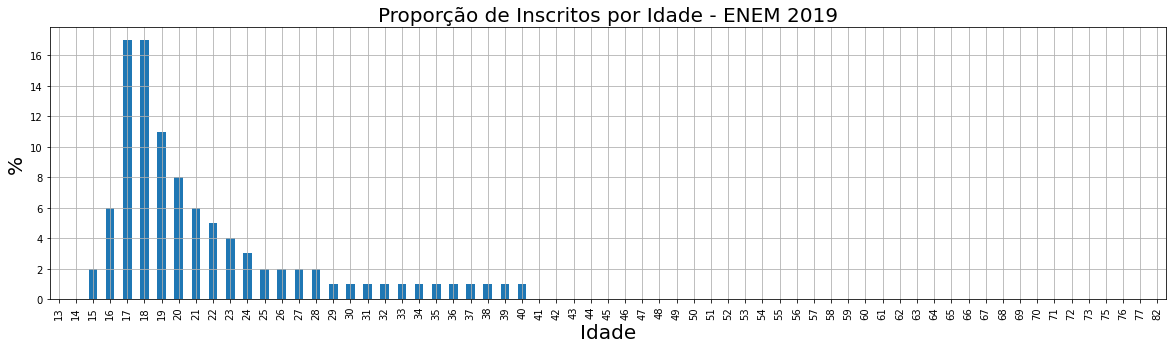

In [ ]:
#Gráfico do percentual das idades dos inscritos
proporcao.sort_index().plot.bar(figsize=(20, 5), grid=True) #Dados ordenados pela idade crescente
plt.xlabel('Idade', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.title('Proporção de Inscritos por Idade - ENEM 2019', fontsize=20)

In [ ]:
'''
Estatísticas Descritivas
count = Número de inscritos (amostra)
std = desvio padrão das idades com relação a média de idade
min = Inscrito com menor idade
25% = Idade Mediana de 25% dos dados
50% = Idade Mediana de 50% dados 
75% = Idade mediana de 75% dos dados
max = Iscrito com maior idade
'''
dados['NU_IDADE'].describe()

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

Considerações:

A media de idade dos estudantes da amostra é de 22 anos;
A dispersão das idades comparada a amostra é de mais ou menos 7 anos;
A idade mínima da amostra é de 13 anos;
A idade máxima da mostra é de 82 anos;
50% dos estudantes da amostra possuem em média 19 anos;

##Desafio 2: Descobrir de quais estados são os inscritos com 13 anos.

In [ ]:
#Estados dos inscritos com 13 anos de idade
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA']

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Descrição

Os quatro inscritos presentes na amostra com 13 nos de idade são dos estados de São Paulo - SP, Mato Grosso - MT, Amapá - AP e Bahia - BA.

##Desafio 4: Plotar os histogramas das idades do grupo treineiro e não treineiro.

In [ ]:
#Idades dos treineiros
treineiro = dados.query('IN_TREINEIRO == 1')
treineiro.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AADCCEDCCDBEABAECBABCEEACDEBDBBDBACBBEEDCADCB,AECBA99999ACDBECAACEAADBEAAAECDAECDEBAAEBCECEA...,DAADCAABECBBCBDADDEEEBCCAABADBBBECAACBDBDDCBC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,180.0,120.0,140.0,160.0,720.0,C,E,D,D,4,F,A,C,C,B,B,B,B,A,A,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AABCDEBCEBCADAAAAEEEBCEEBDECDBACBEDEAABAACDBA,99999ADABAADAEABBAACDAABCDE*DABBABDAAEDAAAACBE...,AAAEDBCCEACBDDCBEAEBBCAAAABCCBABDCAAECCABCBDE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,80.0,60.0,120.0,20.0,400.0,D,E,F,F,4,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEEAABAADADCBCEDBCCACEEDBCBCBADBBAABDBBABCEAB,99999ECABECCBABCDAEADABEBEEBEEEEEDBDDBAACDAEAA...,ACBEDECCABCEDDEDCEDAACBCAADEEDCDEECBABEBAEC*B,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,120.0,100.0,580.0,D,E,B,B,3,B,A,B,C,A,A,B,B,A,A,B,A,A,B,B,A,C,A,A,A


In [ ]:
#Idades dos não treineiros 
nao_treineiro = dados.query('IN_TREINEIRO == 0')
nao_treineiro.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,ECEBDBAACAACBCEEECCACDCEEDBECADBDADEADCAEACBE,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B
6,190001004856,2019,1501402,Belém,15,PA,21,F,1,3,1,1508308.0,Viseu,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BDDCCECDDCACCBBEDBAEEECAECCDBCBCD.CBEBADDBCDD,99999CBBBBBCDBCCEDCDEABDBDECDEC.DEDACEEACDCECE...,DCCCAABCCBECCCDACBDECDCDCBBCECCBCECBCABBCCCEB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,140.0,180.0,180.0,760.0,H,H,A,A,2,C,A,C,D,A,A,B,B,B,A,B,A,A,C,A,A,C,B,A,B


In [ ]:
#Estatística descritiva - Treineiro
treineiro['NU_IDADE'].describe()

count    15401.000000
mean        16.502370
std          1.704543
min         14.000000
25%         16.000000
50%         16.000000
75%         17.000000
max         62.000000
Name: NU_IDADE, dtype: float64

In [ ]:
#Estatística descritiva - Não Treineiro
nao_treineiro['NU_IDADE'].describe()

count    111979.000000
mean         22.863448
std           7.659795
min          13.000000
25%          18.000000
50%          20.000000
75%          25.000000
max          82.000000
Name: NU_IDADE, dtype: float64

Text(0.5, 1.0, 'Distribuição dos Inscritos no ENEM 2019')

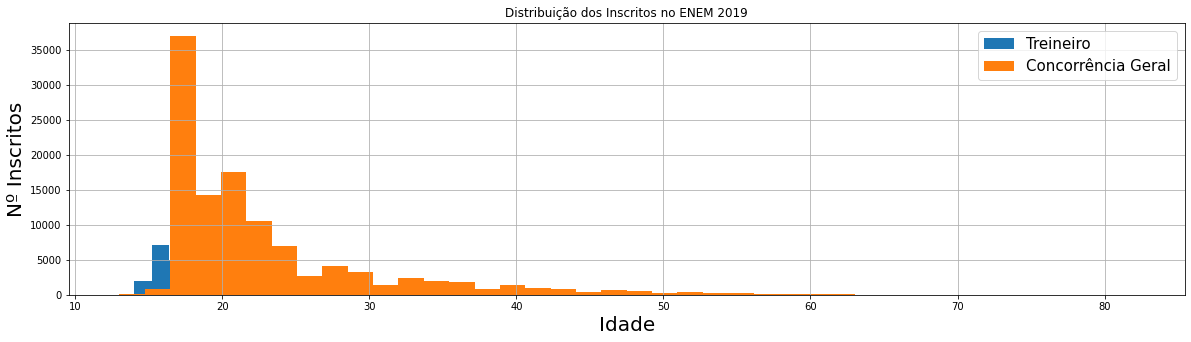

In [ ]:
#Número de inscritos por idade - Treineiro e Não Treineiro
treineiro['NU_IDADE'].hist(bins=40, figsize=(20, 5), label='Treineiro')
nao_treineiro['NU_IDADE'].hist(bins=40, figsize=(20, 5), label='Concorrência Geral')
plt.legend(fontsize=15)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Nº Inscritos', fontsize=20)
plt.title('Distribuição dos Inscritos no ENEM 2019')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


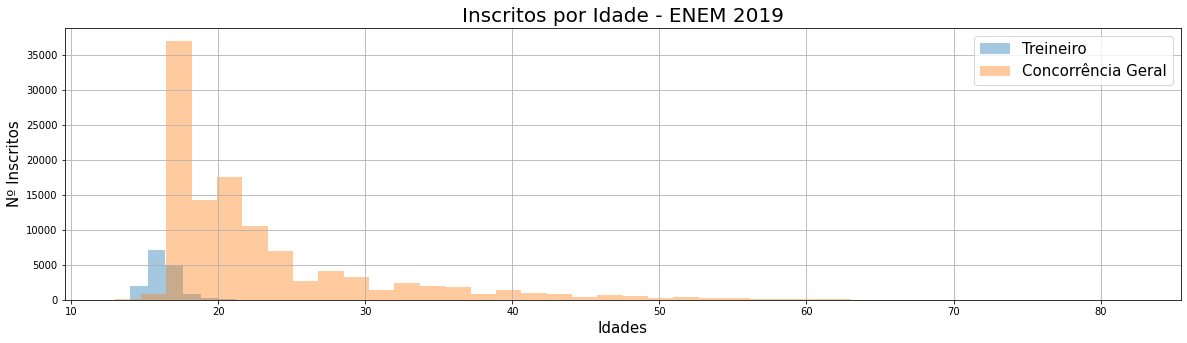

In [ ]:
##Número de inscritos por idade - Treineiro e Não Treineiro
plt.figure(figsize=(20, 5))
sns.distplot(a=treineiro['NU_IDADE'], bins=40, kde=False, label='Treineiro')
sns.distplot(a=nao_treineiro['NU_IDADE'], bins=40, kde=False, label='Concorrência Geral')
plt.legend(fontsize=15)
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Nº Inscritos', fontsize=15)
plt.title('Inscritos por Idade - ENEM 2019', fontsize=20)
plt.grid()

Considerações

As pessoas que fizeram o enem de 2019 como treineiro são em média 6 anos mais jovens;
A idade média dos inscritos treineiros são de 16 anos, enquanto que não treineiro é de 22 anos de idade;

##Desafio 5: Comparar as distribuições das notas das provas em inglês e espanhol.

In [ ]:
#Seleção das notas de linguages e códigos
linguagens_codigos = dados[['NU_NOTA_LC', 'TP_LINGUA']]
linguagens_codigos.shape

(127380, 2)

In [ ]:
#Seleção das notas de linguagem e códigos que optaram por inglês
linguagens_ingles = linguagens_codigos.query('TP_LINGUA == 0')
linguagens_ingles.head()

,NU_NOTA_LC,TP_LINGUA
4,511.2,0
8,576.0,0
9,602.1,0
12,535.8,0
13,455.5,0


In [ ]:
#Visualização do número de linhas
linguagens_ingles.shape

(60571, 2)

In [ ]:
#Seleção das notas de linguagens e códigos que optaram por espanhol 
linguagens_espanhol = linguagens_codigos.query('TP_LINGUA == 1')
linguagens_espanhol.head()

,NU_NOTA_LC,TP_LINGUA
0,488.6,1
1,375.3,1
2,441.0,1
3,551.5,1
5,607.5,1


In [ ]:
#Visualização do número de linas e colunas
linguagens_espanhol.shape

(66809, 2)

In [ ]:
#Estatística descritiva - idioma inglês
'''
count = Número de inscritos que optaram pelo idima inglês como lingua estrangeira
std = Desvio padrão da nota com relação a média
min = Nota mínima na prova
25% = Nota mediana considerando 25% das notas
50% = Nota mediana considerando 50% das notas
75% = Nota mediana considerando 75% das notas
max = Nota máxima na prova
'''
linguagens_ingles['NU_NOTA_LC'].describe()

count    48447.000000
mean       537.679732
std         63.536275
min          0.000000
25%        502.600000
50%        545.500000
75%        581.500000
max        801.700000
Name: NU_NOTA_LC, dtype: float64

In [ ]:
linguagens_espanhol['NU_NOTA_LC'].describe()

count    49596.000000
mean       503.646965
std         61.016081
min          0.000000
25%        468.800000
50%        509.700000
75%        545.200000
max        718.400000
Name: NU_NOTA_LC, dtype: float64

In [ ]:
#Percentual do idioma estrangeiro selecionado pelos inscritos
percentual_ingles = round((linguagens_ingles.shape[0] / linguagens_codigos.shape[0]) * 100)
percentual_espanhol = round((linguagens_espanhol.shape[0] / linguagens_codigos.shape[0]) * 100)
percentual_lingua_estrangeira = pd.DataFrame({'Inglês %': [percentual_ingles], 
                                              'Espanhol %': [percentual_espanhol]})

percentual_lingua_estrangeira.rename(index={0: 'Opção Inscritos'}, inplace=True)

percentual_lingua_estrangeira

,Inglês %,Espanhol %
Opção Inscritos,48,52


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


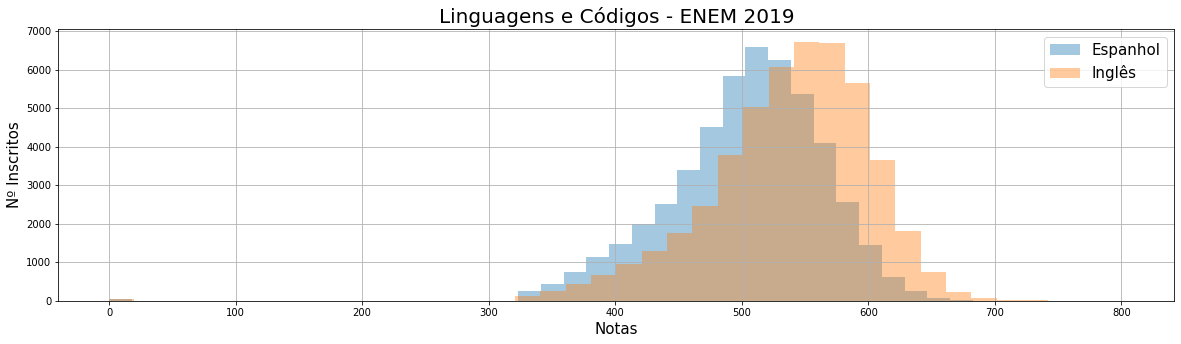

In [ ]:
#Visualização das notas de linguagens e códigos segmentadas pela idioma estrangeiro
plt.figure(figsize=(20, 5))
sns.distplot(a=linguagens_espanhol['NU_NOTA_LC'], bins=40, kde=False, label='Espanhol')
sns.distplot(a=linguagens_ingles['NU_NOTA_LC'], bins=40, kde=False, label='Inglês')
plt.legend(fontsize=15)
plt.xlabel('Notas', fontsize=15)
plt.ylabel('Nº Inscritos', fontsize=15)
plt.title('Linguagens e Códigos - ENEM 2019', fontsize=20)
plt.grid()

Considerações

Os alunos que optaram por inglês na prova de linguagens e códigos possuem média de 537.7, enquanto que os que optaram por espanhol possuem média de 503.6.

Uma melhor forma de analizar esse resultado seria por meio das notas referente apenas as questões de linguas estrangeiras, os dados analisados considera todas as questões da prova de linguas e códigos. 

A minha primeira experiência com o ENEM escolhi a lingua estrageira espanhol por considerar mais fácil (próximo do português), mas os dados revelam que os alunos que escolheram inglês obtiveram melhores resultados.

A minha hipótese é que os inscritos que optam pela lingua estrangeira inglês tenha realmente estudado o idioma. 